In [1]:
import os
import cv2
import numpy as np
import pandas as pd
from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt


DATASET_DIR = r"C:\Users\adity\Downloads/Tomato Leaf Disease Dataset/TomatoDataset"



In [2]:
class_counts = {}

for class_name in os.listdir(DATASET_DIR):
    class_path = os.path.join(DATASET_DIR, class_name)
    if os.path.isdir(class_path):
        class_counts[class_name] = len(os.listdir(class_path))

df_classes = pd.DataFrame.from_dict(class_counts, orient='index', columns=['Jumlah Gambar'])
df_classes


,Jumlah Gambar
Tomato___Bacterial_spot,108
Tomato___Early_blight,298
Tomato___healthy,157
Tomato___Late_blight,111
Tomato___Leaf_Mold,400
Tomato___Septoria_leaf_spot,106
Tomato___Spider_mites Two-spotted_spider_mite,121
Tomato___Target_Spot,99
Tomato___Tomato_mosaic_virus,109
Tomato___Tomato_Yellow_Leaf_Curl_Virus,100


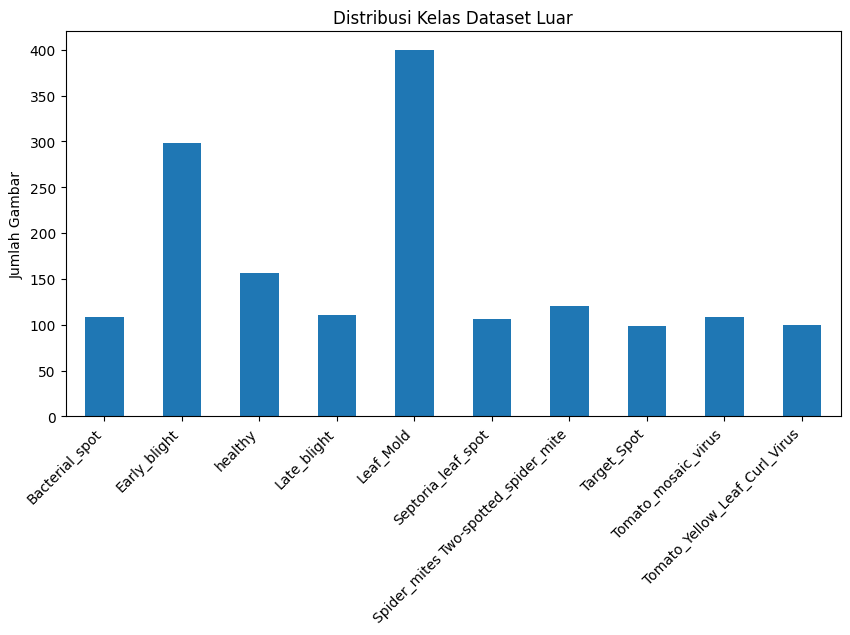

In [3]:
df_classes.index = df_classes.index.str.replace('Tomato___', '')
df_classes.plot(kind='bar', legend=False, figsize=(10,5))
plt.ylabel("Jumlah Gambar")
plt.title("Distribusi Kelas Dataset Luar")
plt.xticks(rotation=45, ha='right')
plt.show()

In [4]:
resolutions = []
formats = []

for class_name in os.listdir(DATASET_DIR):
    class_path = os.path.join(DATASET_DIR, class_name)
    if not os.path.isdir(class_path):
        continue

    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        try:
            with Image.open(img_path) as img:
                resolutions.append(img.size)
                formats.append(img.format)
        except:
            pass

res_df = pd.DataFrame(resolutions, columns=["Width", "Height"])
res_df.describe()


,Width,Height
count,1609.000000,1609.000000
mean,1128.483530,1225.262896
std,1191.879719,1249.840704
min,256.000000,256.000000
25%,256.000000,256.000000
50%,780.000000,1040.000000
75%,1040.000000,1280.000000
max,4096.000000,4096.000000


In [5]:
pd.Series(formats).value_counts()


JPEG    1609
Name: count, dtype: int64

In [6]:
corrupt_images = []

for class_name in os.listdir(DATASET_DIR):
    class_path = os.path.join(DATASET_DIR, class_name)
    if not os.path.isdir(class_path):
        continue

    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        try:
            img = cv2.imread(img_path)
            if img is None:
                corrupt_images.append(img_path)
        except:
            corrupt_images.append(img_path)

print(f"Jumlah gambar rusak: {len(corrupt_images)}")


Jumlah gambar rusak: 0


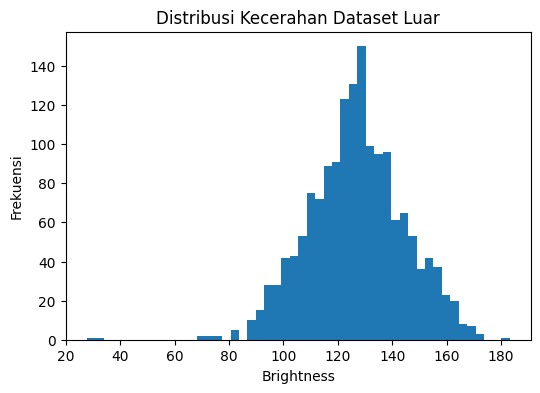

In [7]:
brightness_values = []

for class_name in os.listdir(DATASET_DIR):
    class_path = os.path.join(DATASET_DIR, class_name)
    if not os.path.isdir(class_path):
        continue

    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            brightness_values.append(np.mean(img))

plt.figure(figsize=(6,4))
plt.hist(brightness_values, bins=50)
plt.title("Distribusi Kecerahan Dataset Luar")
plt.xlabel("Brightness")
plt.ylabel("Frekuensi")
plt.show()


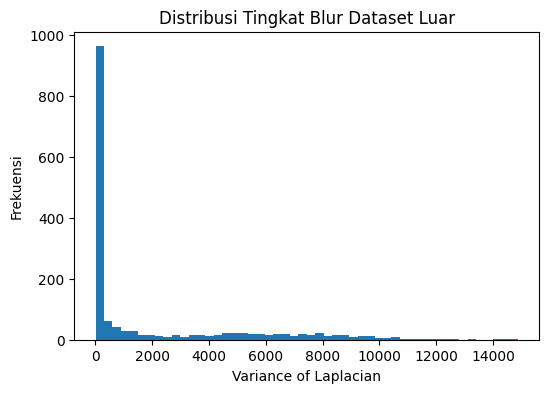

In [8]:
blur_values = []

for class_name in os.listdir(DATASET_DIR):
    class_path = os.path.join(DATASET_DIR, class_name)
    if not os.path.isdir(class_path):
        continue

    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            blur = cv2.Laplacian(img, cv2.CV_64F).var()
            blur_values.append(blur)

plt.figure(figsize=(6,4))
plt.hist(blur_values, bins=50)
plt.title("Distribusi Tingkat Blur Dataset Luar")
plt.xlabel("Variance of Laplacian")
plt.ylabel("Frekuensi")
plt.show()


In [9]:
summary = {
    "Total Gambar": len(brightness_values),
    "Rata-rata Brightness": np.mean(brightness_values),
    "Rata-rata Blur": np.mean(blur_values),
    "Jumlah Gambar Rusak": len(corrupt_images),
    "Resolusi Dominan": res_df.mode().iloc[0].to_dict()
}

pd.DataFrame(summary, index=[0])


,Total Gambar,Rata-rata Brightness,Rata-rata Blur,Jumlah Gambar Rusak,Resolusi Dominan
0,1609,126.841116,1991.769096,0,NaN


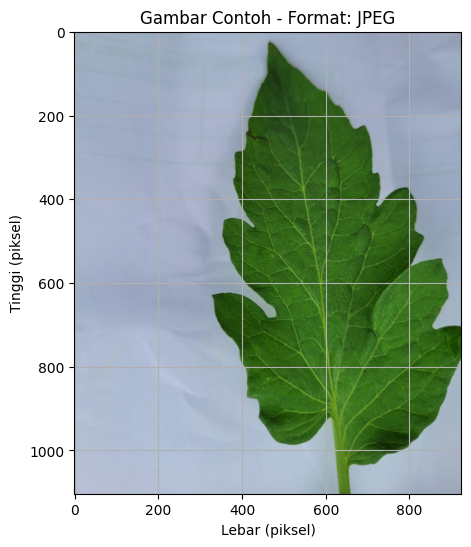

Jalur Gambar: C:\Users\adity\Downloads/Tomato Leaf Disease Dataset/TomatoDataset\Tomato___Late_blight\IMG-20240717-WA0031.jpg
Format Gambar: JPEG
Resolusi Gambar: 925x1104 piksel


In [10]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import random
import os

# Collect all image paths into a list
image_paths = []
for class_name in os.listdir(DATASET_DIR):
    class_path = os.path.join(DATASET_DIR, class_name)
    if os.path.isdir(class_path):
        for img_name in os.listdir(class_path):
            image_paths.append(os.path.join(class_path, img_name))

# Create a DataFrame from the image paths
df = pd.DataFrame({"path": image_paths})

# Ambil satu path gambar secara acak dari DataFrame
sample_image_path = df["path"].sample(1, random_state=random.randint(1, 10000)).iloc[0]

# Baca gambar menggunakan OpenCV untuk tampilan
img_cv2 = cv2.imread(sample_image_path)
img_cv2_rgb = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB)

# Buka gambar menggunakan PIL untuk mendapatkan format
with Image.open(sample_image_path) as img_pil:
    image_format = img_pil.format

# Tampilkan gambar dengan sumbu
plt.figure(figsize=(6, 6))
plt.imshow(img_cv2_rgb)
plt.title(f"Gambar Contoh - Format: {image_format}")
plt.xlabel("Lebar (piksel)")
plt.ylabel("Tinggi (piksel)")
plt.grid(True)
plt.show()

print(f"Jalur Gambar: {sample_image_path}")
print(f"Format Gambar: {image_format}")
print(f"Resolusi Gambar: {img_cv2.shape[1]}x{img_cv2.shape[0]} piksel")

In [11]:
import numpy as np

widths, heights = [], []

for path in df["path"].sample(400, random_state=42):
    img = cv2.imread(path)
    if img is not None:
        h, w, _ = img.shape
        heights.append(h)
        widths.append(w)

print(f"Resolusi minimum  : {min(widths)} x {min(heights)}")
print(f"Resolusi maksimum : {max(widths)} x {max(heights)}")
print(f"Resolusi rata-rata: {int(np.mean(widths))} x {int(np.mean(heights))}")

Resolusi minimum  : 256 x 256
Resolusi maksimum : 4096 x 4096
Resolusi rata-rata: 1057 x 1231


In [12]:
import numpy as np
import pandas as pd

# Calculate dominant format
if 'formats' in locals() and formats:
    dominant_format = pd.Series(formats).value_counts().index[0]
else:
    dominant_format = "Tidak ditemukan"

# Calculate average brightness
if 'brightness_values' in locals() and brightness_values:
    avg_brightness = np.mean(brightness_values)
else:
    avg_brightness = "N/A"

# Calculate average blur
if 'blur_values' in locals() and blur_values:
    avg_blur = np.mean(blur_values)
else:
    avg_blur = "N/A"

# Calculate dominant resolution
if 'res_df' in locals() and not res_df.empty:
    # Get the most frequent resolution (width, height)
    # value_counts() returns a Series where index are the unique (Width, Height) tuples
    # and values are their counts. .index[0] gives the most frequent tuple.
    dominant_resolution_tuple = res_df.value_counts().index[0]
    dominant_resolution = f"{dominant_resolution_tuple[0]}x{dominant_resolution_tuple[1]}"
else:
    dominant_resolution = "Tidak ada data resolusi"

summary_data = {
    "Metrik": [
        "Format Gambar Dominan",
        "Rata-rata Kecerahan",
        "Rata-rata Tingkat Blur",
        "Resolusi Dominan"
    ],
    "Nilai": [
        dominant_format,
        f"{avg_brightness:.2f}",
        f"{avg_blur:.2f}",
        dominant_resolution
    ]
}

summary_df = pd.DataFrame(summary_data)
display(summary_df)

,Metrik,Nilai
0,Format Gambar Dominan,JPEG
1,Rata-rata Kecerahan,126.84
2,Rata-rata Tingkat Blur,1991.77
3,Resolusi Dominan,256x256
